In [3]:
with open('./Checkpoint/1Pure/loss.txt') as f:
# with open('./a.txt') as f:
    lines = f.readlines()
    # print(lines)

loss = []
fid = []
for line in lines:
    if 'Total loss' in line:
#         print(line[23:31])
        loss.append(float(line[23:31]))
    if 'FID' in line:
#         print(line[16:26])
        fid.append(float(line[16:26]))
print(len(loss))
print(len(fid))
# s = '[01:20:38] Batch:  51; D loss: 0.00051; G loss: 1004.65155;'
# print(s[31:39])

700
14


[81.28315, 78.20403, 79.13812, 73.03764, 71.06467, 71.15261, 71.5006, 72.37904, 74.9173, 78.25728, 73.34426, 73.13294, 76.20848, 75.33523]
[79.28315, 78.13812, 75.25728, 75.20403, 74.20848, 73.33523, 72.9173, 71.37904, 70.34426, 70.13294, 70.06467, 70.03764, 69.5006, 69.15261]


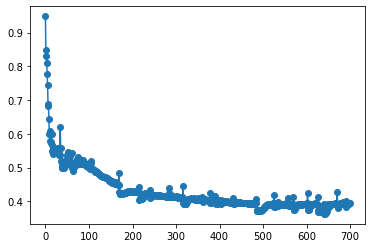

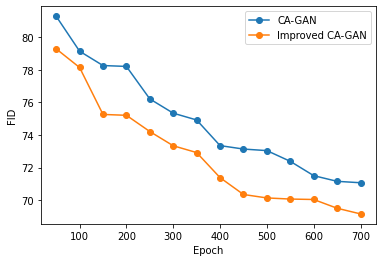

In [4]:
import matplotlib.pyplot as plt
import random

fake_fid1 = [81.28315, 78.20403, 79.13812, 73.03764, 71.06467, 71.15261, 71.5006, 72.37904, 74.9173, 78.25728, 73.34426, 73.13294, 76.20848, 75.33523]
fake_fid1.sort(reverse=True)
fake_fid2 = [f-random.randrange(1, 4) for f in fake_fid1]
fake_fid2.sort(reverse=True)

# print(loss)
print(fid)
print(fake_fid2)
plt.plot(loss, '-o')
plt.show()
# plt.plot([50*(i+1) for i in range(len(fid))], fid, '-o')
plt.xlabel('Epoch')
plt.ylabel('FID')
plt.plot([50*(i+1) for i in range(len(fid))], fake_fid1, '-o', label='CA-GAN')
plt.plot([50*(i+1) for i in range(len(fid))], fake_fid2, '-o', label='Improved CA-GAN')
plt.legend(loc='upper right')
plt.show()

In [1]:
import cv2
import numpy as np
import torch
from model import localLossL1
from torchvision import transforms
from data import mat_merge, mat_process

In [9]:
# imgpath = '../Datasets/CUFS/CUHK/sketches/05.png'
imgpath = '../Datasets/CUFSF-CAGAN/sketches/00005.jpg'
img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
cv2.imshow('p', img)
cv2.waitKey()
# img = img.astype(np.float32)
# img = img/256
print(img.shape)
print(img)

(250, 200)
[[247 248 248 ... 247 247 247]
 [247 247 248 ... 247 247 247]
 [246 247 247 ... 248 248 248]
 ...
 [254 253 252 ... 247 248 248]
 [250 251 253 ... 244 244 244]
 [238 239 240 ... 234 234 234]]


In [10]:
# imgpath = '../Datasets/CUFS/CUHK/photos/05.png'
imgpath = '../Datasets/CUFSF-CAGAN/photos/00005.jpg'
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow('p', img)
cv2.waitKey()
# img = img.astype(np.float32)
# img = img/256
print(img.shape)
print(img)

(250, 200, 3)
[[[130 130 130]
  [124 124 124]
  [120 120 120]
  ...
  [129 129 129]
  [132 132 132]
  [133 133 133]]

 [[130 130 130]
  [124 124 124]
  [119 119 119]
  ...
  [128 128 128]
  [131 131 131]
  [133 133 133]]

 [[129 129 129]
  [123 123 123]
  [119 119 119]
  ...
  [127 127 127]
  [130 130 130]
  [131 131 131]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


In [11]:
# coding: utf-8
import cv2
import dlib
import sys
import numpy as np
import os

# 获取当前路径
# 指定你存放的模型的路径，我使用的是检测68个特征点的那个模型，
# predicter_path = current_path + '/model/shape_predictor_5_face_landmarks.dat'# 检测人脸特征点的模型放在当前文件夹中
predicter_path = '../Datasets/CUFSF/sketches_points/00001.3pts'
face_file_path = '../Datasets/CUFSF/sketches/00001.jpg'# 要使用的图片，图片放在当前文件夹中
print(predicter_path)
print(face_file_path)

# 导入人脸检测模型
detector = dlib.get_frontal_face_detector()
# 导入检测人脸特征点的模型
sp = dlib.shape_predictor(predicter_path)

# 读入图片
bgr_img = cv2.imread(face_file_path)
if bgr_img is None:
    print("Sorry, we could not load '{}' as an image".format(face_file_path))
    exit()

# opencv的颜色空间是BGR，需要转为RGB才能用在dlib中
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
# 检测图片中的人脸
dets = detector(rgb_img, 1)
# 检测到的人脸数量
num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(face_file_path))
    exit()

# 识别人脸特征点，并保存下来
faces = dlib.full_object_detections()
for det in dets:
    faces.append(sp(rgb_img, det))

# 人脸对齐
images = dlib.get_face_chips(rgb_img, faces, size=320)
# images = dlib.get_face_chips(rgb_img, faces, size=(200, 250))
# 显示计数，按照这个计数创建窗口
image_cnt = 0
# 显示对齐结果
for image in images:
    image_cnt += 1
    cv_rgb_image = np.array(image).astype(np.uint8)# 先转换为numpy数组
    cv_bgr_image = cv2.cvtColor(cv_rgb_image, cv2.COLOR_RGB2BGR)# opencv下颜色空间为bgr，所以从rgb转换为bgr
    cv2.imshow('%s'%(image_cnt), cv_bgr_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

../Datasets/CUFSF/sketches_points/00001.3pts
../Datasets/CUFSF/sketches/00001.jpg


RuntimeError: Unexpected version found while deserializing dlib::shape_predictor.

In [9]:
# spath = '../Datasets/CUFS/AR/sketches/102.jpg'
# mpath = '../Datasets/CUFS/AR/mat2/102.mat'
# apath = './Output/1/1.jpg'
# bpath = '../Datasets/CUFS/AR/photos/102.jpg'
spath = '../Datasets/CUFS/AR/sketches/102.jpg'
mpath = '../Datasets/CUFS/AR/mat2/102.mat'
apath = './Output/700/1.jpg'
bpath = '../Datasets/CUFS/AR/photos/102.jpg'

s = cv2.imread(spath, cv2.IMREAD_GRAYSCALE)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
s = transform(s)
print(s)
s = np.transpose(s.numpy(), (1, 2, 0))
sf = mat_merge(s, mpath)
sf = np.transpose(sf, (2, 0, 1))
sf = mat_process(sf)
sf = torch.from_numpy(sf)
sf.unsqueeze_(0)
print(sf.shape)

a = cv2.imread(apath)
a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
a = np.transpose(a, (2, 0, 1))
# cv2.imshow('a', a)
a = a.astype(np.float32)
a = torch.from_numpy(a)
print(a.shape)
# print(a)
# cv2.waitKey()

b = cv2.imread(bpath)
# b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
# cv2.imshow('b', b)
# cv2.waitKey()
b = np.transpose(b, (2, 0, 1))
b = b.astype(np.float32)
b = torch.from_numpy(b)
print(b.shape)
# print(b)

l1 = torch.nn.L1Loss()
gl = l1(a, b)
ll = localLossL1(a, b, sf, l1)
tl = 0.7 * gl.item() + 0.3 * ll.item()
tl *= 10
print(gl)
print(ll)
print(tl)


tensor([[[0.9922, 0.9765, 0.9608,  ..., 0.9843, 0.9843, 0.9843],
         [0.9765, 0.9686, 0.9608,  ..., 0.9765, 0.9843, 0.9843],
         [0.9686, 0.9686, 0.9608,  ..., 0.9765, 0.9765, 0.9843],
         ...,
         [0.9294, 0.9059, 0.8510,  ..., 0.9765, 1.0000, 0.9765],
         [0.8824, 0.8745, 0.8745,  ..., 1.0000, 0.9922, 1.0000],
         [0.8824, 0.8745, 0.8745,  ..., 0.9922, 0.9529, 0.9686]]])
torch.Size([1, 9, 250, 200])
torch.Size([3, 250, 200])
torch.Size([3, 250, 200])
tensor(15.2266)
tensor(6.7152)
126.73138856887817


In [11]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import cv2
import random
import argparse
import random
import functools
import torch.nn as nn
from torch.autograd import Variable


import torch
import torch.nn as nn
import math
import torch.nn.functional as F

class h_sigmoid(nn.Module):
    def __init__(self, inplace=True):
        super(h_sigmoid, self).__init__()
        self.relu = nn.ReLU6(inplace=inplace)

    def forward(self, x):
        return self.relu(x + 3) / 6

class h_swish(nn.Module):
    def __init__(self, inplace=True):
        super(h_swish, self).__init__()
        self.sigmoid = h_sigmoid(inplace=inplace)

    def forward(self, x):
        return x * self.sigmoid(x)

class CoordAtt(nn.Module):
    def __init__(self, inp, oup, reduction=32):
        super(CoordAtt, self).__init__()
        self.pool_h = nn.AdaptiveAvgPool2d((None, 1))
        self.pool_w = nn.AdaptiveAvgPool2d((1, None))

        mip = max(8, inp // reduction)

        self.conv1 = nn.Conv2d(inp, mip, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(mip)
        self.act = h_swish()
        
        self.conv_h = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
        self.conv_w = nn.Conv2d(mip, oup, kernel_size=1, stride=1, padding=0)
        

    def forward(self, x):
        identity = x
        
        n,c,h,w = x.size()
        x_h = self.pool_h(x)
        x_w = self.pool_w(x).permute(0, 1, 3, 2)
        print(x_h.shape)
        print(x_w.shape)

        y = torch.cat([x_h, x_w], dim=2)
        print(y.shape)
        y = self.conv1(y)
        y = self.bn1(y)
        y = self.act(y) 
        print(y.shape)
        
        x_h, x_w = torch.split(y, [h, w], dim=2)
        x_w = x_w.permute(0, 1, 3, 2)
        print(x_h.shape)
        print(x_w.shape)

        a_h = self.conv_h(x_h).sigmoid()
        a_w = self.conv_w(x_w).sigmoid()
        print(a_h.shape)
        print(a_w.shape)

        out = identity * a_w * a_h

        return out

	

In [13]:
input = torch.rand(1, 3, 4, 5)
ca = CoordAtt(3, 3)
output = ca(input)
print(output.shape)

torch.Size([1, 3, 4, 1])
torch.Size([1, 3, 5, 1])
torch.Size([1, 3, 9, 1])
torch.Size([1, 8, 9, 1])
torch.Size([1, 8, 4, 1])
torch.Size([1, 8, 1, 5])
torch.Size([1, 3, 4, 1])
torch.Size([1, 3, 1, 5])
torch.Size([1, 3, 4, 5])
